In [12]:
import sys, imp, os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
from tools.instruments import instruments
from tools.common import monitor_memory
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.visualisation import ohlc_chart, view

* 메모리사용량 체크

In [75]:
#del sys.modules['tools.common']
del sys.modules['tools.instruments']
#del sys.modules['tools.visualisation']
#del sys.modules['tools.constants']

In [3]:
[i.symbol for i in instruments.values() if i.srf]

['AD',
 'BO',
 'BP',
 'C',
 'CC',
 'CD',
 'CL',
 'CT',
 'DX',
 'EC',
 'ED',
 'ES',
 'FF',
 'FV',
 'G',
 'GC',
 'HG',
 'HO',
 'JY',
 'KC',
 'KW',
 'LC',
 'LN',
 'MD',
 'MP',
 'NE',
 'NG',
 'NK',
 'NQ',
 'O',
 'OJ',
 'PA',
 'PL',
 'RB',
 'RR',
 'RS1',
 'RTY',
 'S',
 'SB',
 'SF',
 'SI',
 'SM',
 'SP',
 'TU',
 'TY',
 'US',
 'W']

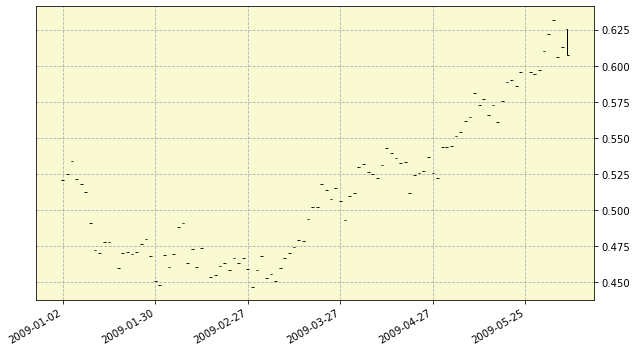

In [87]:
view(instruments.quotes(db='srf', method='bv', start='2009-01-01', end='2009-06-05')['AD'])

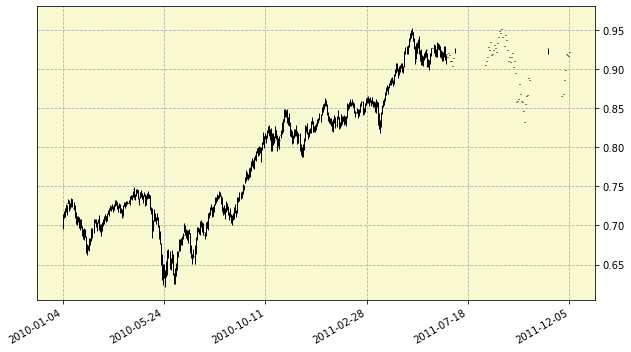

In [81]:
view(instruments.quotes(db='srf', method='bo', start='2010-01-01', end='2011-12-05')['AD'])

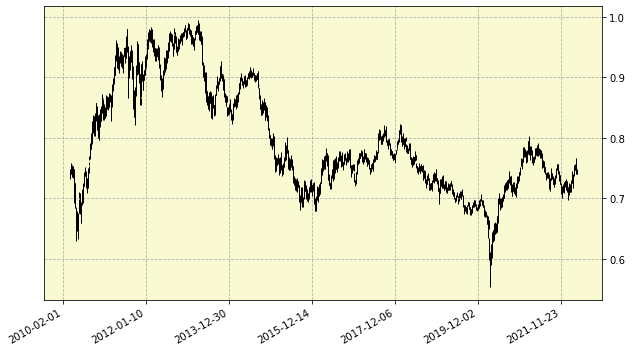

In [80]:
view(instruments.quotes(db='kibot', start='2010-01-01')['AD'])

In [18]:
file = h5py.File(SRF_CONTINUOUS_BO_DB_PATH, 'r')

In [55]:
for k,v in file.items():
    print(k)

AD
BO
BP
C
CC
CD
CL
CT
DX
EC
ED
ES
FF
FV
G
GC
HG
HO
JY
KC
KW
LC
LN
MD
MP
NE
NG
NK
NQ
O
OJ
PA
PL
RB
RS1
RTY
S
SB
SF
SI
SM
SP
TU
TY
US
W


In [54]:
list(file.keys())

['AD',
 'BO',
 'BP',
 'C',
 'CC',
 'CD',
 'CL',
 'CT',
 'DX',
 'EC',
 'ED',
 'ES',
 'FF',
 'FV',
 'G',
 'GC',
 'HG',
 'HO',
 'JY',
 'KC',
 'KW',
 'LC',
 'LN',
 'MD',
 'MP',
 'NE',
 'NG',
 'NK',
 'NQ',
 'O',
 'OJ',
 'PA',
 'PL',
 'RB',
 'RS1',
 'RTY',
 'S',
 'SB',
 'SF',
 'SI',
 'SM',
 'SP',
 'TU',
 'TY',
 'US',
 'W']

In [356]:
df = instruments['AD'].quotes(format='pandas')

In [361]:
type(df.reset_index()['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [362]:
isinstance(df.reset_index()['date'][0], pd.Timestamp)

True

In [292]:
class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt
        self.xidx = []

    def __call__(self, x, pos):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        self.xidx.append(ind)
        
        if ind < 0:
            return ''
        
        
        #print(self.dates[ind].strftime(self.fmt))
        
        if ind >= len(self.dates):
            diff = self.xidx[1] - self.xidx[0]
            print((self.dates.iloc[-1] + pd.Timedelta(days=diff)).strftime(self.fmt))
            return (self.dates.iloc[-1] + pd.Timedelta(days=diff)).strftime(self.fmt)

        return self.dates[ind].strftime(self.fmt)



2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15
2022-04-15


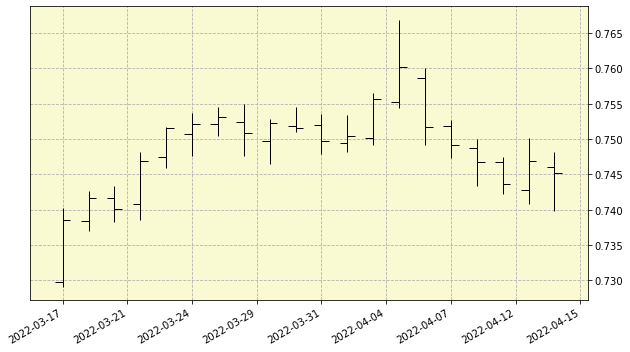

In [293]:
myformatter = MyFormatter(df['date'])
fig = plt.figure(figsize=(10,6))

ax = plt.gca()
#ax.xaxis.set_major_formatter(formatter)
ohlc_chart(ax, df)
ax.xaxis.set_major_formatter(myformatter)
s = plt.xticks()
fig.autofmt_xdate()

In [235]:
s[1]

[Text(-2.5, 0, ''),
 Text(0.0, 0, '2022-03-17'),
 Text(2.5, 0, '2022-03-21'),
 Text(5.0, 0, '2022-03-24'),
 Text(7.5, 0, '2022-03-28'),
 Text(10.0, 0, '2022-03-31'),
 Text(12.5, 0, '2022-04-04'),
 Text(15.0, 0, '2022-04-07'),
 Text(17.5, 0, '2022-04-11'),
 Text(20.0, 0, ''),
 Text(22.5, 0, '')]

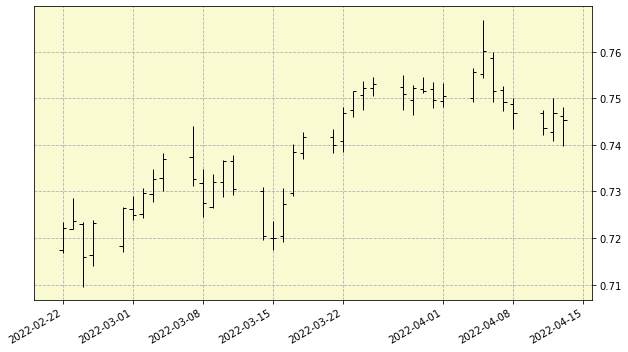

In [192]:
view(ad[-37:])

In [319]:
ad = instruments['AD'].quotes()

In [320]:
ad.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [321]:
isinstance(ad, np.ndarray)

True

AttributeError: 'numpy.ndarray' object has no attribute 'index'

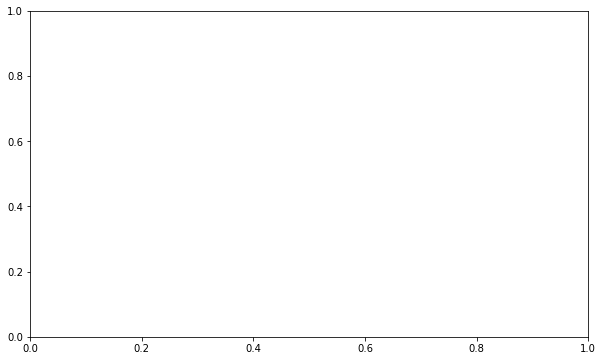

In [322]:
view(ad)

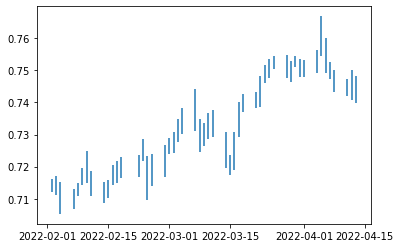

In [33]:
fig, ax = plt.subplots()
ad = ad.iloc[-50:]
ax.vlines( ad.index, ad['low'], ad['high'])
plt.show()

In [34]:
plt.close('all')

In [95]:
s=np.copy(df[['date','volume']])

In [144]:
file = h5py.File(os.path.join(DATADIR,'kibot/quotes.hdf'), 'r')

In [148]:
file['AD']['date','open']

array([( 9353, 0.7285), ( 9356, 0.7285), ( 9357, 0.7285), ...,
       (19093, 0.7468), (19094, 0.7428), (19095, 0.7461)],
      dtype=[('date', '<i4'), ('open', '<f4')])

In [45]:
dtypes_old[0] = (dtypes_old[0][0], 'M8[D]')

In [131]:
s=df[['date','open','high','low','close','open_interest']]

In [196]:
s[np.where(s['date']>18275)][:5]

array([(18276, 0.691 , 0.6926, 0.6887, 0.6913,  70440, 0),
       (18277, 0.6914, 0.6943, 0.6897, 0.6904,  76664, 0),
       (18278, 0.6906, 0.6921, 0.688 , 0.6887,  69449, 0),
       (18282, 0.6885, 0.6898, 0.6851, 0.6854, 125648, 0),
       (18283, 0.6851, 0.6865, 0.6836, 0.6852,  87192, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('volume', '<i4'), ('open_interest', '<i4')])

In [194]:
s[np.where(s['date']>np.datetime64('2020-01-14').astype('i'))][:5]

array([(18276, 0.691 , 0.6926, 0.6887, 0.6913,  70440, 0),
       (18277, 0.6914, 0.6943, 0.6897, 0.6904,  76664, 0),
       (18278, 0.6906, 0.6921, 0.688 , 0.6887,  69449, 0),
       (18282, 0.6885, 0.6898, 0.6851, 0.6854, 125648, 0),
       (18283, 0.6851, 0.6865, 0.6836, 0.6852,  87192, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('volume', '<i4'), ('open_interest', '<i4')])

In [189]:
np.array(18275).astype('M8[D]')

array('2020-01-14', dtype='datetime64[D]')

In [127]:
s=s.astype([('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('open_interest', '<i4')])

In [128]:
s

array([( 9353, 0.7285, 0.7285 , 0.7285 , 0.7285 , 0),
       ( 9356, 0.7285, 0.7285 , 0.7285 , 0.7285 , 0),
       ( 9357, 0.7285, 0.7285 , 0.7285 , 0.7285 , 0), ...,
       (19093, 0.7468, 0.74745, 0.74215, 0.74365, 0),
       (19094, 0.7428, 0.75015, 0.74075, 0.74685, 0),
       (19095, 0.7461, 0.7482 , 0.73985, 0.74525, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('open_interest', '<i4')])

In [50]:
df = df.astype(dtypes_new)

In [53]:
df['date']['2020-01-01':'2020-12-12']

TypeError: slice indices must be integers or None or have an __index__ method

In [55]:
df['date'][12:]

array(['1995-08-29', '1995-08-30', '1995-08-31', ..., '2022-04-11',
       '2022-04-12', '2022-04-13'], dtype='datetime64[D]')

In [43]:
df.dtype.fields

mappingproxy({'date': (dtype('int32'), 0),
              'open': (dtype('<f4'), 4),
              'high': (dtype('<f4'), 8),
              'low': (dtype('<f4'), 12),
              'close': (dtype('<f4'), 16),
              'volume': (dtype('int32'), 20),
              'open_interest': (dtype('int32'), 24)})

In [8]:
df = ad.quotes(format='pandas')

In [13]:
df = ad.quotes()

In [23]:
df['date'] = df['date'].astype('M8[D]')

In [25]:
df

array([( 9353, 0.7285, 0.7285 , 0.7285 , 0.7285 ,     2, 0),
       ( 9356, 0.7285, 0.7285 , 0.7285 , 0.7285 ,     2, 0),
       ( 9357, 0.7285, 0.7285 , 0.7285 , 0.7285 ,     2, 0), ...,
       (19093, 0.7468, 0.74745, 0.74215, 0.74365, 61761, 0),
       (19094, 0.7428, 0.75015, 0.74075, 0.74685, 70937, 0),
       (19095, 0.7461, 0.7482 , 0.73985, 0.74525, 79717, 0)],
      dtype=[('date', '<i4'), ('open', '<f4'), ('high', '<f4'), ('low', '<f4'), ('close', '<f4'), ('volume', '<i4'), ('open_interest', '<i4')])

In [12]:
df - df.max()

,open,high,low,close,volume,open_interest
date,,,,,,
1995-08-11,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-14,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-15,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-16,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
1995-08-17,-0.36670,-0.37200,-0.36210,-0.36520,-304384.0,0.0
...,...,...,...,...,...,...
2022-04-07,-0.34335,-0.34785,-0.34325,-0.34450,-228079.0,0.0
2022-04-08,-0.34645,-0.35050,-0.34720,-0.34695,-240885.0,0.0
2022-04-11,-0.34840,-0.35305,-0.34845,-0.35005,-242625.0,0.0
